In [84]:
import numpy as np
import pandas as pd
train_images = np.load("train_x.npy")
test_images = np.load("test_x.npy")
y_train = pd.read_csv("train_y.csv")["Label"]

In [85]:
from sklearn.model_selection import train_test_split
#Reshaping the data
train_images=train_images.reshape(train_images.shape[0],128,128,1)
test_images=test_images.reshape(test_images.shape[0],128,128,1)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(train_images, y_train, test_size=0.1, random_state=7)
y_test=y_test_d

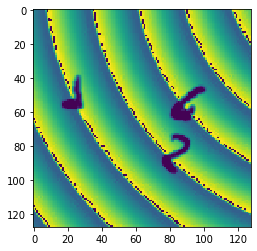

In [86]:
import matplotlib.pyplot as plt

def show_image(arr):
    two_d = (np.reshape(arr, (128, 128)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[0]) # 0 is the index of the training image you want to displayc

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [88]:
X = X_train_d
# scaling data
X = X/255.0

In [89]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [90]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [91]:
model.add(Flatten())
model.add(Dense(64))

In [92]:
model.add(Dense(1))
model.add(Activation("softmax"))

In [95]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])
model.fit(X,y_train_d,batch_size=20,epochs=10)

Epoch 1/10
1800/1800 [==============================] - 335s 186ms/step - loss: 8.2895e-07 - accuracy: 8.6111e-04
Epoch 2/10
 173/1800 [=>............................] - ETA: 5:06 - loss: 8.3329e-07 - accuracy: 8.6705e-04

KeyboardInterrupt: 